In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

## Filter out data
- Get a smaller data set for faster training
- choose one image you want to target

In [13]:
y_train == 0

array([False,  True, False, ..., False, False, False])

In [25]:
allZeros = X_train[y_train == 0]

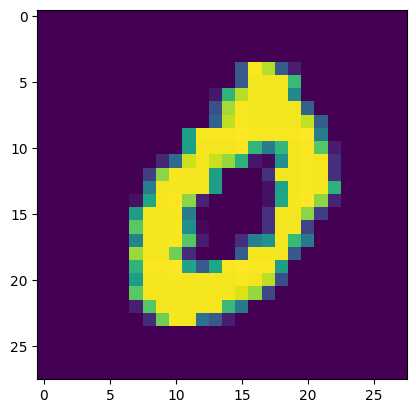

In [26]:
plt.imshow(allZeros[3])

In [12]:
allOnes.shape

(6742, 28, 28)

## Creating Generator and Discriminator

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
import tensorflow as tf

## Discriminitor
- Taking batch of real images , sample from only zeros or all
- equal number of fake images 
- Set labels 0 fake 1 for real 
- discrimitor is trained on label batch we set 
- back proougation on optimized weights from discrimitor

In [20]:
discrimiator = Sequential()
discrimiator.add(Flatten(input_shape = [28,28]))
discrimiator.add(Dense(units=150, activation="relu"))
discrimiator.add(Dense(units=100, activation="relu"))

## final output 
discrimiator.add(Dense(units=1, activation="sigmoid"))

discrimiator.compile(loss = "binary_crossentropy", optimizer = "adam")

## Generator
- choose the coding size -> latent representaiton 
- looks alot of the decoder , expand back out to try to fool the discrimitor

In [21]:
codings_size = 100
## 100 - 150-784
## units doesnt have to match input shape

generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape = [codings_size]))
generator.add(Dense(150, activation="relu"))
generator.add(Dense(784, activation="relu"))

##Expects a 2D input
generator.add(Reshape([28,28]))

In [22]:
gan = Sequential([generator, discrimiator])

In [23]:
discrimiator.trainable = False

In [ ]:
gan.compile(loss = "binary_crossentropy", optimizer = "adam")

In [24]:
batchSize = 32

In [27]:
myData = allZeros

In [28]:
datset = tf.data.Dataset.from_tensor_slices(myData).shuffle(buffer_size=1000)

In [29]:
datset

<ShuffleDataset shapes: (28, 28), types: tf.uint8>

In [32]:
dataSet = datset.batch(batchSize, drop_remainder=True).prefetch(1)

In [33]:
epochs = 1

In [34]:
dataSet

<PrefetchDataset shapes: (32, 28, 28), types: tf.uint8>

In [38]:
gan.layers[0].layers

In [39]:
gan.layers[1].layers

In [41]:
gan.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [42]:
gan.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [43]:
generator, discriminator = gan.layers

for epoch in range(epochs):
    print(f"currently on epoch {epoch + 1}")
    i = 0
    
    for X_batch in dataSet:
        i =  i + 1
        if i%100 == 0:
            print(f"if currently in batch number {i}")